In [1]:
import os
stop_dirs = os.listdir('/home/student/data/stops')

In [2]:
print(stop_dirs)

['7255', '863', '2269', '5122', '3400', '4666', '30', '2817', '2496', '4023', '3636', '825', '2722', '3075', '2448', '638', '7234', '1185', '7168', '4285', '3824', '912', '4825', '3836', '2322', '3396', '6188', '3645', '7231', '3572', '7065', '4958', '2129', '7388', '4765', '1712', '1101', '384', '2554', '3573', '723', '4551', '1318', '3897', '4333', '3418', '526', '653', '2334', '2557', '1210', '2265', '5161', '2379', '2857', '1997', '4230', '1333', '4209', '3478', '4251', '397', '4088', '7426', '371', '1624', '40', '1239', '6252', '572', '1266', '3615', '7233', '4865', '4451', '2314', '3663', '4372', '178', '1863', '4331', '7329', '4151', '2227', '6285', '3123', '2087', '1775', '2483', '2614', '564', '1857', '1387', '3577', '5155', '636', '7031', '2151', '4755', '1952', '2534', '1760', '2195', '7128', '951', '5135', '4446', '2670', '179', '7222', '4611', '4673', '1964', '6005', '1449', '3100', '7397', '4509', '7164', '2970', '124', '4304', '2763', '694', '1985', '2551', '201', '1877'

## What do we want to cluster on?

idea - Begin with dwell time and 'speed' between two stops

In [3]:
from dbanalysis.stop_tools import stop_getter
s_getter = stop_getter()
from dbanalysis import headers as hds

In [4]:
import pandas as pd
d = {'from_stop':[],'to_stop':[],'dwelltime':[],'speed':[]}

In [5]:
def prep_stop(df,fromstop,tostop):
    df['traveltime']=df['actualtime_arr_to']-df['actualtime_dep_from']
    df['dwelltime']=df['actualtime_dep_from']-df['actualtime_arr_from']
    df['distance'] = s_getter.get_stop_distance(fromstop,tostop)
    df['speed'] = df['distance'] / (df['traveltime']/3600)
    return df

In [6]:
for fromstop in stop_dirs:
    
    for tostop in os.listdir('/home/student/data/stops/'+fromstop):
        
        if tostop != 'orphans.csv':
            
            ts = tostop.split('.')[0]
            df = pd.read_csv('/home/student/data/stops/'+fromstop+'/'+tostop,names=hds.get_stop_link_headers())
            df=prep_stop(df,fromstop,ts)
            d['from_stop'].append(fromstop)
            d['to_stop'].append(ts)
            d['dwelltime'].append(df['dwelltime'].mean())
            d['speed'].append(df['speed'].mean())
    

KeyboardInterrupt: 

In [ ]:
len(stop_dirs)

In [13]:
cluster_frame = pd.DataFrame(d)

In [14]:
cluster_frame

,from_stop,to_stop,dwelltime,speed
0,7255,7249,0.326241,46.420340
1,863,864,4.431488,41.053667
2,2269,2270,12.883303,19.722759
3,5122,3461,4.753153,31.945691
4,3400,3401,19.731470,37.938959
5,4666,4667,4.952786,41.566212
6,30,69,4.706652,21.998544
7,2817,2818,9.093142,34.063705
8,2496,2497,9.276933,29.527016
9,4023,4024,0.652597,49.142354


In [21]:
import numpy as np

In [22]:
df = cluster_frame[np.isfinite(cluster_frame['speed'])]

In [23]:
df.shape[0]

5094

Didn't have proper shapes for 600 of them ---> worrying.

Either that or zero division errors?

In [19]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 10).fit(df[['dwelltime','speed']])

In [27]:
kmeans.cluster_centers_

array([[  6.74241962,  41.59088028],
       [  7.84931157,  19.46218619],
       [ 61.36232214,  17.13624462],
       [ 11.67935543, 153.34739666],
       [158.09620347,  16.74028135],
       [504.4375    ,   7.76710809],
       [  7.16982456, 429.98363047],
       [  8.20811303,  30.35649329],
       [ 24.5489009 ,  23.37003662],
       [  2.66392848,  58.4440301 ]])

In [28]:
kmeans.labels_

array([0, 0, 1, ..., 7, 1, 8], dtype=int32)

In [30]:
df['cluster_lables']=kmeans.labels_

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df

,from_stop,to_stop,dwelltime,speed,cluster_lables
0,7255,7249,0.326241,46.420340,0
1,863,864,4.431488,41.053667,0
2,2269,2270,12.883303,19.722759,1
3,5122,3461,4.753153,31.945691,7
4,3400,3401,19.731470,37.938959,0
5,4666,4667,4.952786,41.566212,0
6,30,69,4.706652,21.998544,1
7,2817,2818,9.093142,34.063705,7
8,2496,2497,9.276933,29.527016,7
9,4023,4024,0.652597,49.142354,9


In [32]:
df.scatter(x='dwelltime',y='speed')

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [33]:
from matplotlib import pyplot as plt

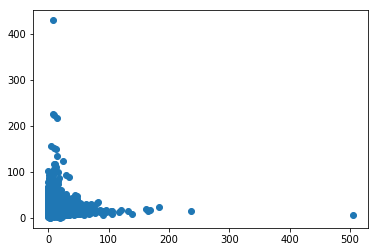

In [35]:
plt.scatter(x=df['dwelltime'],y=df['speed'])

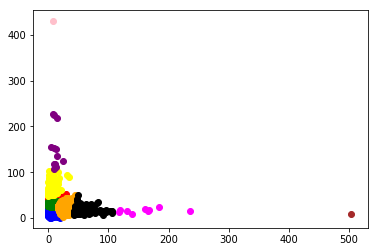

In [37]:
colors = ['red','blue','green','yellow','orange','black','pink','purple','magenta','brown']
i=0
for label in df['cluster_lables'].unique():
    gf=df[df['cluster_lables']==label]
    plt.scatter(x=gf['dwelltime'],y=gf['speed'],c=colors[i])
    i+=1
plt.show()
    
    

## This is really not at all what I thought it would be

In [ ]:
#High speed stops don't seem to have high dwell time

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "import os\nstop_dirs = os.listdir('/home/student/data/stops')",
  'stop_dirs',
  'print(stop_dirs)',
  'from dbanalysis.stop_tools import stop_getter\ns_getter = stop_getter()',
  'import pandas as pd',
  'from dbanalysis.stop_tools import stop_getter\ns_getter = stop_getter()\nfrom dbanalysis import headers as hds',
  'dir(s_getter)',
  "def prep_stop(df,fromstop,tostop):\n    df['traveltime']=df['actualtime_arr_to']-df['actualtime_dep_from']\n    df['dwelltime']=df['actualtime_dep_from']-df['actualtime_arr_from']\n    df['distance'] = s_getter.get_stop_distance(fromstop,tostop)\n    df['speed'] = df['distance'] / (df['traveltime']/3600)\n    return df",
  "import pandas as pd\nd = {'from_stop':[],'to_stop':[]

## Next stage - a matrix - with all different variables per day hour?

In [41]:
d2 = {(key1+'_'+key2+'dwell':[], key1+key2+['speed']:[]) for key2 in range(0,24) for key1 in range(0,7)}

SyntaxError: invalid syntax (<ipython-input-41-54425bec77c4>, line 1)

## Computing average speed and dwell time for every hour of every week day :)

In [42]:
d2={}
for day in range(7):
    
    for hour in range(24):
        
        d2[str(day)+'_'+str(hour)+'dwell']=[]
        d2[str(day)+'_'+str(hour)+'speed']=[]

In [43]:
def prep_stop2(df,fromstop,tostop):
    df['traveltime']=df['actualtime_arr_to']-df['actualtime_dep_from']
    df['dwelltime']=df['actualtime_dep_from']-df['actualtime_arr_from']
    df['distance'] = s_getter.get_stop_distance(fromstop,tostop)
    df['speed'] = df['distance'] / (df['traveltime']/3600)
    df['dt'] =pd.to_datetime(df['dayofservice'],format="%d-%b-%y %H:%M:%S")
    df['day']=df['dt'].dt.dayofweek
    df['hour']=df['actualtime_arr_from']//3600
    for day in range(0,7):
        
        for hour in range(0,24):
            
            df[str(day)+'_'+str(hour)+'dwell']=df[(df['day']==day) & (df['hour']==hour)]['dwelltime'].mean()
            df[str(day)+'_'+str(hour)+'speed']=df[(df['day']==day) & (df['hour']==hour)]['speed'].mean()
        
    return df

In [ ]:
for fromstop in stop_dirs:
    
    for tostop in os.listdir('/home/student/data/stops/'+fromstop):
        
        if tostop != 'orphans.csv':
            
            ts = tostop.split('.')[0]
            df = pd.read_csv('/home/student/data/stops/'+fromstop+'/'+tostop,names=hds.get_stop_link_headers())
            df=prep_stop2(df,fromstop,ts)
            d['from_stop'].append(fromstop)
            d['to_stop'].append(ts)
            d['dwelltime'].append(df['dwelltime'].mean())
            d['speed'].append(df['speed'].mean())
            for day in range(7):
    
                for hour in range(24):
        
                    d2[str(day)+'_'+str(hour)+'dwell'].append(df[str(day)+'_'+str(hour)+'dwell'])
                    d2[str(day)+'_'+str(hour)+'speed'].append(df[str(day)+'_'+str(hour)+'speed'])

In [ ]:
## The above is probably going to run for a ridiculously long time. In fact, it doesn't look like it will ever finish

#Looking like O(n**some silly figure)

In [ ]:
cluster_frame = pd.DataFrame(d2)
cluster_frame.to_csv('clusterframe.csv',index=False)